In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = 60.0; #um^2/s
alpha = 1.4*1e-4; #um^2/s
R = 5.0; #um
K = 32.51/0.033; #unitless
vol_fraction = 0.4; #unitless
L = 100; #um
cinit = 1.0; #mol/um^3

nspace = 21; #Division in space
nkernel = 10; #Number of kernel expansions
timestep = 0.25; #s
decay_limit = 0.1; #Limite of kernel decay
maxwindow = 1000;

dx = L/(nspace-1)

In [20]:
res = np.loadtxt("../data/result_realistic")
res_clean = np.loadtxt("../data/result_realistic_clean")
res_detailed = np.loadtxt("../data/result_realistic_detailed")
res_xdetailed = np.loadtxt("../data/result_realistic_xdetailed")
res_cylinder = np.loadtxt("../data/result_realistic_cylinder")

In [6]:
def make_time_space(res, timestep):
    t = np.arange(res.shape[0])*timestep + timestep;
    x = np.linspace(0, L, res.shape[1]);
    return t, x
t, x = make_time_space(res, timestep);
t_clean, x_clean = make_time_space(res_clean, timestep);
t_detailed, x_detailed = make_time_space(res_detailed, timestep/5);
t_xdetailed, x_xdetailed = make_time_space(res_xdetailed, timestep);
t_xdetailed, x_xdetailed = make_time_space(res_xdetailed, timestep);

In [7]:
dx2 = dx/3

In [8]:
res.shape

(100000, 21)

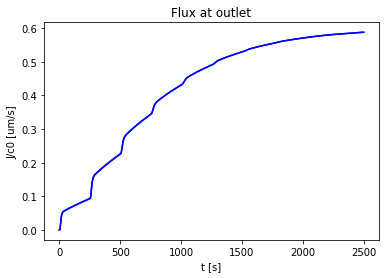

In [9]:
%matplotlib inline
iscale = 10000
plt.plot(t[:iscale], D*res[:iscale, -2]/dx, color='blue')
plt.plot(t_xdetailed[:iscale], D*res_xdetailed[:iscale, -2]/dx2, color='blue')

plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.savefig("../tex/figs/flux")

In [10]:
#np.log(16)/3*l**2/(np.pi**2*ti)
ti = 1200
De = np.log(16)/3*L**2/(np.pi**2*ti)
De*1e-12

7.803388085853653e-13

In [11]:
t_detailed

array([5.000000e-02, 1.000000e-01, 1.500000e-01, ..., 2.499990e+04,
       2.499995e+04, 2.500000e+04])

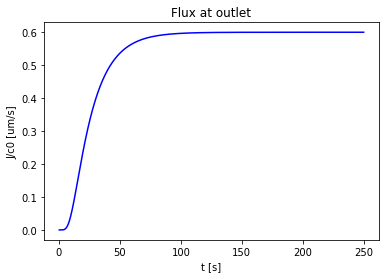

In [12]:
iscale = 1000
plt.plot(t_clean[:iscale], D*res_clean[:iscale, -2]/dx, color='blue')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.savefig("../tex/figs/flux")

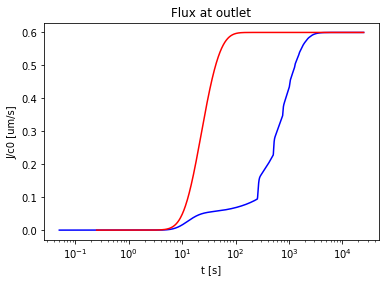

In [13]:
plt.plot(t_detailed, D*res_detailed[:, -2]/dx, color='blue')
plt.plot(t_clean, D*res_clean[:, -2]/dx, color='red')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.semilogx();
plt.savefig("../tex/figs/flux")

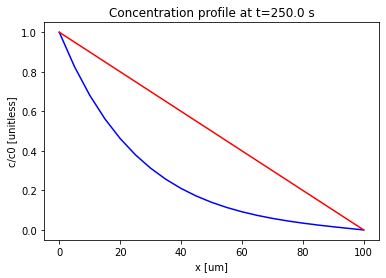

In [14]:
i = 999
plt.plot(x, res[i, :], color='blue')
plt.plot(x_clean, res_clean[i, :], color='red')
plt.xlabel("x [um]")
plt.ylabel("c/c0 [unitless]")
plt.title("Concentration profile at t={0} s".format(i*timestep+timestep))
plt.savefig("../tex/figs/profile%i"%i)